In [1]:
import numpy as np 
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train=pd.read_csv('train.csv')


In [4]:
test=pd.read_csv('test.csv')

In [5]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [8]:
train.shape

(18834, 11)

In [9]:
test.shape

(8072, 9)

In [10]:
print(train.dtypes)
print('*'*25)
print(test.dtypes)

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object
*************************
pet_id           object
issue_date       object
listing_date     object
condition       float64
color_type       object
length(m)       float64
height(cm)      float64
X1                int64
X2                int64
dtype: object


In [11]:
train['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [12]:
train['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

imbalaced classes in target variables
There are 3 classes in breed category -> 0, 1, 2
there are 4 classes in pet category -> 0, 1, 2, 4
No class labelled 3 in pet category.

In [13]:
Total=train.isnull().sum().sort_values(ascending=False)
Percent=(train.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percent']) #keys new colums ka name hai
missing_data

,Total,Percent
condition,1477,0.078422
pet_category,0,0.000000
breed_category,0,0.000000
X2,0,0.000000
X1,0,0.000000
height(cm),0,0.000000
length(m),0,0.000000
color_type,0,0.000000
listing_date,0,0.000000
issue_date,0,0.000000


In [14]:
Total=test.isnull().sum().sort_values(ascending=False)
Percent=(test.isnull().sum()/len(test)).sort_values(ascending=False)
missing_data_test=pd.concat([Total,Percent],axis=1,keys=['Total','Percent']) #keys new colums ka name hai
missing_data_test

,Total,Percent
condition,619,0.076685
X2,0,0.000000
X1,0,0.000000
height(cm),0,0.000000
length(m),0,0.000000
color_type,0,0.000000
listing_date,0,0.000000
issue_date,0,0.000000
pet_id,0,0.000000


In [15]:
# Col1: pet_id
print(train.shape)
print(train.pet_id.nunique())

print()

print(test.shape)
print(test.pet_id.nunique())

(18834, 11)
18834

(8072, 9)
8072


In [16]:
train.sort_values(by=['pet_id']).head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
4553,ANSL_49970,2011-05-24 00:00:00,2018-06-14 14:03:00,2.0,Tan,0.78,45.95,0,7,1.0,2
2090,ANSL_49971,2016-08-30 00:00:00,2017-03-07 12:09:00,2.0,Black,0.45,9.38,13,9,1.0,2
15657,ANSL_49974,2017-06-29 00:00:00,2017-09-22 00:00:00,2.0,White,0.72,23.17,13,9,0.0,2
5946,ANSL_49977,2017-12-04 00:00:00,2018-04-02 13:03:00,1.0,Black,0.38,33.51,7,1,0.0,1
16917,ANSL_49978,2009-07-14 00:00:00,2016-08-15 16:39:00,0.0,Blue,0.78,32.64,13,9,1.0,2


In [17]:
test.sort_values(by=['pet_id']).head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
4304,ANSL_49972,2014-05-23 00:00:00,2018-06-22 11:41:00,1.0,Orange Tabby,0.17,26.81,0,1
998,ANSL_49973,2012-04-07 00:00:00,2017-05-10 00:00:00,2.0,Tan,0.89,36.74,13,9
7105,ANSL_49975,2017-03-26 00:00:00,2018-05-28 11:58:00,1.0,Black,0.57,21.53,0,1
6167,ANSL_49976,2017-07-21 00:00:00,2017-09-02 17:47:00,NaN,Seal Point,0.41,32.13,13,9
3659,ANSL_49979,2008-11-10 00:00:00,2016-07-19 16:11:00,1.0,Black,0.32,20.73,0,7


In [18]:
train.sort_values(by=['issue_date']).head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
1499,ANSL_69711,1994-12-23 00:00:00,2017-01-11 13:46:00,NaN,Lilac Point,0.65,40.07,0,7,2.0,1
8572,ANSL_68753,1995-06-23 00:00:00,2017-07-13 15:48:00,0.0,Tortie,0.62,18.78,0,7,1.0,1
1151,ANSL_52377,1997-06-10 00:00:00,2017-07-07 12:47:00,0.0,White,0.61,12.79,13,9,1.0,1
3284,ANSL_60566,1998-02-03 00:00:00,2018-02-24 11:41:00,0.0,White,0.02,14.38,0,7,1.0,2
5127,ANSL_51478,1998-03-03 00:00:00,2018-03-26 00:00:00,2.0,White,0.30,27.72,13,9,0.0,0


In [7]:
# feature engg
# getting substring from pet_id for new feature
train['nf1_pet_id'] = train['pet_id'].str[:6]
#train['nf2_pet_id'] = train['pet_id'].str[:7]

In [8]:
test['nf1_pet_id'] = test['pet_id'].str[:6]

In [9]:
# check for new feature-1
print(train.nf1_pet_id.nunique())
print(train.nf1_pet_id.value_counts())

4
ANSL_6    7005
ANSL_5    6999
ANSL_7    4813
ANSL_4      17
Name: nf1_pet_id, dtype: int64


In [10]:
# check for new feature-1
print(test.nf1_pet_id.nunique())
print(test.nf1_pet_id.value_counts())

4
ANSL_5    3000
ANSL_6    2995
ANSL_7    2064
ANSL_4      13
Name: nf1_pet_id, dtype: int64


In [11]:
train.groupby(['nf1_pet_id','breed_category']).size()

nf1_pet_id  breed_category
ANSL_4      0.0                 11
            1.0                  5
            2.0                  1
ANSL_5      0.0               3303
            1.0               3149
            2.0                547
ANSL_6      0.0               3348
            1.0               3065
            2.0                592
ANSL_7      0.0               2338
            1.0               2138
            2.0                337
dtype: int64

In [12]:
test['pet_id'].str[:6].value_counts()

ANSL_5    3000
ANSL_6    2995
ANSL_7    2064
ANSL_4      13
Name: pet_id, dtype: int64

In [16]:
# Col2-3: issue_data and listing_date 

#anomoly detection datetime- train
train['issue_date']=pd.to_datetime(train['issue_date'])
train['listing_date']=pd.to_datetime(train['listing_date'])
train['duration_days']=(train['listing_date']-train['issue_date']).dt.days
train.loc[train['listing_date']<train['issue_date']]

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,nf1_pet_id,duration_days


In [17]:
train.drop([1504, 5301],inplace=True)

KeyError: '[1504 5301] not found in axis'

In [18]:
test['issue_date']=pd.to_datetime(test['issue_date'])
test['listing_date']=pd.to_datetime(test['listing_date'])
test['duration_days']=(test['listing_date']-test['issue_date']).dt.days
test.loc[test['listing_date']<test['issue_date']]

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,nf1_pet_id,duration_days


In [19]:
# Col4: condition it is not ordinal we cal fill with a randoom value
train['condition']=train['condition'].fillna(-99)
test['condition']=test['condition'].fillna(-99)
print(train['condition'].value_counts())
print('*'*25)
print(test['condition'].value_counts())

 1.0     6819
 0.0     6280
 2.0     4256
-99.0    1477
Name: condition, dtype: int64
*************************
 1.0     2928
 0.0     2685
 2.0     1840
-99.0     619
Name: condition, dtype: int64


In [20]:
train.groupby(['condition','pet_category']).size()

condition  pet_category
-99.0      0                 51
           1                583
           2                 60
           4                783
 0.0       1               2375
           2               3875
           4                 30
 1.0       1               2218
           2               4576
           4                 25
 2.0       0                 37
           1               2006
           2               2110
           4                103
dtype: int64

In [21]:
train.groupby(['condition','breed_category']).size()

condition  breed_category
-99.0      2.0               1477
 0.0       1.0               6280
 1.0       0.0               6819
 2.0       0.0               2180
           1.0               2076
dtype: int64

In [22]:
train['is_condt_neg99'] = [1 if x==-99 else 0 for x in train['condition']]
train['is_condt_zero'] = [1 if x==0 else 0 for x in train['condition']]
train['is_condt_one'] = [1 if x==1 else 0 for x in train['condition']]

In [23]:
test['is_condt_neg99'] = [1 if x==-99 else 0 for x in test['condition']]
test['is_condt_zero'] = [1 if x==0 else 0 for x in test['condition']]
test['is_condt_one'] = [1 if x==1 else 0 for x in test['condition']]

In [24]:
test.condition[test.condition == 1 ] = 0
test.condition[test.condition == 0 ] = 0
test.condition[test.condition == -99 ] = 0
test.condition[test.condition == 2 ] = 1

train.condition[train.condition == 1 ] = 0
train.condition[train.condition == 0 ] = 0
train.condition[train.condition == -99 ] = 0
train.condition[train.condition == 2 ] = 1


In [25]:
train.rename(columns = {'condition':'condition2'}, inplace = True)

In [26]:
test.rename(columns = {'condition':'condition2'}, inplace = True)

In [27]:
train.drop(['pet_id','issue_date','listing_date'], axis = 1,inplace=True) 
test.drop(['pet_id','issue_date','listing_date'], axis = 1,inplace=True) 

In [28]:
test.head()

,condition2,color_type,length(m),height(cm),X1,X2,nf1_pet_id,duration_days,is_condt_neg99,is_condt_zero,is_condt_one
0,0.0,Black,0.87,42.73,0,7,ANSL_7,4404,0,1,0
1,0.0,Orange Tabby,0.06,6.71,0,1,ANSL_7,174,0,0,1
2,0.0,Black,0.24,41.21,0,7,ANSL_5,1999,0,0,1
3,0.0,Black,0.29,8.46,7,1,ANSL_6,1148,0,0,1
4,0.0,Brown,0.71,30.92,0,7,ANSL_7,463,0,0,1


In [37]:
train['colorType_ordinal_labels'].nunique()

56

In [34]:
train.head(10)

,condition2,length(m),height(cm),X1,X2,breed_category,pet_category,nf1_pet_id,duration_days,is_condt_neg99,is_condt_zero,is_condt_one,colorType_ordinal_labels
0,1.0,0.80,7.78,13,9,0.0,1,ANSL_6,73,0,0,0,12
1,0.0,0.72,14.19,13,9,0.0,2,ANSL_6,1862,0,0,1,27
2,0.0,0.15,40.90,15,4,2.0,4,ANSL_6,752,1,0,0,53
3,0.0,0.62,17.82,0,1,0.0,2,ANSL_7,755,0,0,1,27
4,1.0,0.50,11.06,18,4,0.0,1,ANSL_5,52,0,0,0,26
5,0.0,0.92,29.56,0,7,1.0,2,ANSL_5,501,0,1,0,51
6,1.0,0.14,40.24,0,1,0.0,1,ANSL_7,154,0,0,0,12
7,0.0,0.15,25.48,7,1,1.0,1,ANSL_5,89,0,1,0,27
8,1.0,0.05,38.22,13,9,1.0,2,ANSL_7,299,0,0,0,53
9,1.0,0.55,21.26,13,9,1.0,2,ANSL_5,1123,0,0,0,53


In [30]:
#color type will do ordinal target guided encodig
for feature in train.columns[:]:
    print(feature,":",len(train[feature].unique()),'labels')

condition2 : 2 labels
color_type : 56 labels
length(m) : 101 labels
height(cm) : 4425 labels
X1 : 20 labels
X2 : 10 labels
breed_category : 3 labels
pet_category : 4 labels
nf1_pet_id : 4 labels
duration_days : 2707 labels
is_condt_neg99 : 2 labels
is_condt_zero : 2 labels
is_condt_one : 2 labels


In [38]:
ordinal_labels=train.groupby('color_type')['pet_category'].mean().sort_values().index ##will give order of mean wrt to target
ordinal_label2={k:i for i,k in enumerate(ordinal_labels,0)}
train['colorType_ordinal_labels']=train['color_type'].map(ordinal_label2)

KeyError: 'color_type'

In [39]:
train.drop(['color_type'], axis = 1,inplace=True) 

KeyError: "['color_type'] not found in axis"

In [40]:
test['colorType_ordinal_labels']=test['color_type'].map(ordinal_label2)
test.drop(['color_type'], axis = 1,inplace=True) 

KeyError: 'color_type'

In [41]:
one_hot1 = pd.get_dummies(train['nf1_pet_id'])
one_hot1.shape
train = pd.concat([train,one_hot1], axis=1)
train = train.drop(['nf1_pet_id'],axis = 1)

In [42]:
one_hot1 = pd.get_dummies(test['nf1_pet_id'])
one_hot1.shape
test = pd.concat([test,one_hot1], axis=1)
test = test.drop(['nf1_pet_id'],axis = 1)

In [43]:
train.head()

,condition2,length(m),height(cm),X1,X2,breed_category,pet_category,duration_days,is_condt_neg99,is_condt_zero,is_condt_one,colorType_ordinal_labels,ANSL_4,ANSL_5,ANSL_6,ANSL_7
0,1.0,0.80,7.78,13,9,0.0,1,73,0,0,0,12,0,0,1,0
1,0.0,0.72,14.19,13,9,0.0,2,1862,0,0,1,27,0,0,1,0
2,0.0,0.15,40.90,15,4,2.0,4,752,1,0,0,53,0,0,1,0
3,0.0,0.62,17.82,0,1,0.0,2,755,0,0,1,27,0,0,0,1
4,1.0,0.50,11.06,18,4,0.0,1,52,0,0,0,26,0,1,0,0


In [44]:
# Col5: color_type
print(train['color_type'].value_counts())
print('*'*40)
print(test['color_type'].value_counts())

KeyError: 'color_type'

In [61]:
train.groupby(['color_type', 'pet_category']).size()

color_type         pet_category
Agouti             2                  2
                   4                  2
Apricot            2                 13
Black              0                 16
                   1               1681
                   2               2730
                   4                193
Black Brindle      2                 66
Black Smoke        1                 30
                   2                  2
Black Tabby        1                 55
Black Tiger        2                  1
Blue               0                  4
                   1                422
                   2                422
                   4                  4
Blue Cream         1                  7
                   2                  3
Blue Merle         2                104
Blue Point         1                 20
Blue Smoke         1                  6
Blue Tabby         1                386
Blue Tick          2                 21
Blue Tiger         2                 10
Brown   

In [62]:
train.groupby(['color_type','breed_category']).size()

color_type         breed_category
Agouti             0.0                  1
                   1.0                  2
                   2.0                  1
Apricot            0.0                  6
                   1.0                  7
Black              0.0               2367
                   1.0               1930
                   2.0                323
Black Brindle      0.0                 39
                   1.0                 27
Black Smoke        0.0                 15
                   1.0                 15
                   2.0                  2
Black Tabby        0.0                 22
                   1.0                 19
                   2.0                 14
Black Tiger        1.0                  1
Blue               0.0                434
                   1.0                382
                   2.0                 36
Blue Cream         0.0                  1
                   1.0                  9
Blue Merle         0.0                 53


In [63]:
print(train['color_type'].nunique())
print(test['color_type'].nunique())

56
54


In [65]:
set(train.color_type)-set(test.color_type)

{'Black Tiger', 'Brown Tiger'}

In [66]:
# Col6-7: length(m) and height(cm)

In [ ]:
sns.distplot(train['length(m)'])

In [ ]:
df=train[['length(m)','height(cm)']]
df['length(cm)']=df['length(m)']*100
df[['length(cm)','height(cm)']].boxplot()

####Many pets have length zero

In [70]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,duration_days
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,-6.949665,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143,855.306786
std,26.862998,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919,1096.674990
min,-99.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-76.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000,119.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000,392.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000,1117.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000,8056.000000


In [46]:
print(len(train[train['length(m)']==0]))
print(len(test[test['length(m)']==0]))

93
44


*93 rows in train and 44 column in test have length column zero

In [47]:
#convert length(m) to length(cm)
train['length(cm)']=train['length(m)'].apply(lambda x:x*100)
test['length(cm)']=test['length(m)'].apply(lambda x:x*100)

In [48]:
#drop length(m)
train.drop('length(m)',axis=1,inplace=True)
test.drop('length(m)',axis=1,inplace=True)

In [49]:
train[train['length(cm)']==0].groupby(['length(cm)','pet_category']).size()

length(cm)  pet_category
0.0         1               35
            2               56
            4                2
dtype: int64

In [50]:
val=train['length(cm)'].mean() ##MCAR

train['length(cm)']=train['length(cm)'].replace(to_replace=0,value=val)
test['length(cm)']=test['length(cm)'].replace(to_replace=0,value=val)

In [62]:
print(len(train[train['length(cm)']==0]))
print(len(test[test['length(cm)']==0]))

0
0


In [63]:
train[['length(cm)','height(cm)']].describe()

,length(cm),height(cm)
count,18832.000000,18832.000000
mean,50.508614,27.447977
std,28.652341,13.019967
min,1.000000,5.000000
25%,26.000000,16.170000
50%,50.260408,27.335000
75%,76.000000,38.890000
max,100.000000,50.000000


In [53]:
#new feature
train['ratio_len_height'] = train['length(cm)']/train['height(cm)']
#new feature
test['ratio_len_height'] = test['length(cm)']/test['height(cm)']

In [54]:
#train.groupby(['ratio_len_height','pet_category']).size()

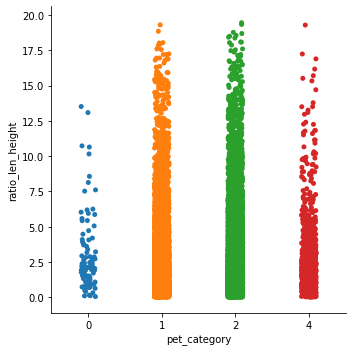

In [64]:
sns.catplot(x='pet_category',y='ratio_len_height',data=train)

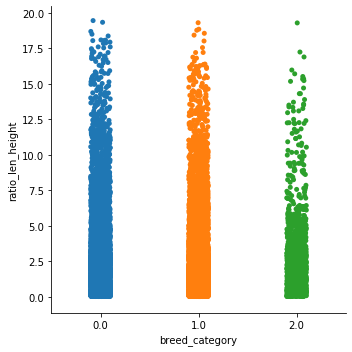

In [65]:
sns.catplot(x='breed_category',y='ratio_len_height',data=train)

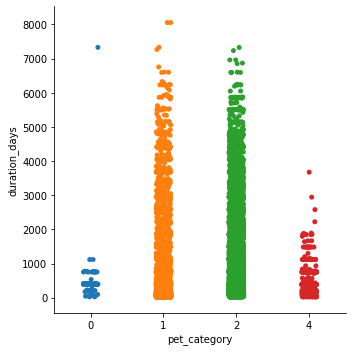

In [66]:
sns.catplot(x='pet_category',y='duration_days',data=train)

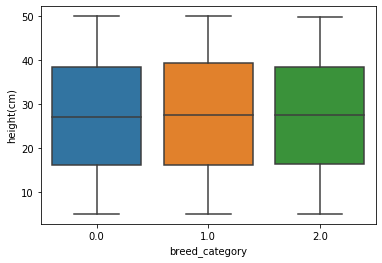

In [67]:
sns.boxplot(x='breed_category',y='height(cm)',data=train)

In [68]:
train.head()

,condition2,height(cm),X1,X2,breed_category,pet_category,duration_days,is_condt_neg99,is_condt_zero,is_condt_one,colorType_ordinal_labels,ANSL_4,ANSL_5,ANSL_6,ANSL_7,length(cm),ratio_len_height
0,1.0,7.78,13,9,0.0,1,73,0,0,0,12,0,0,1,0,80.0,10.282776
1,0.0,14.19,13,9,0.0,2,1862,0,0,1,27,0,0,1,0,72.0,5.073996
2,0.0,40.90,15,4,2.0,4,752,1,0,0,53,0,0,1,0,15.0,0.366748
3,0.0,17.82,0,1,0.0,2,755,0,0,1,27,0,0,0,1,62.0,3.479237
4,1.0,11.06,18,4,0.0,1,52,0,0,0,26,0,1,0,0,50.0,4.520796


In [69]:
test.head()

,condition2,height(cm),X1,X2,duration_days,is_condt_neg99,is_condt_zero,is_condt_one,colorType_ordinal_labels,ANSL_4,ANSL_5,ANSL_6,ANSL_7,length(cm),ratio_len_height
0,0.0,42.73,0,7,4404,0,1,0,26,0,0,0,1,87.0,2.036040
1,0.0,6.71,0,1,174,0,0,1,4,0,0,0,1,6.0,0.894188
2,0.0,41.21,0,7,1999,0,0,1,26,0,1,0,0,24.0,0.582383
3,0.0,8.46,7,1,1148,0,0,1,26,0,0,1,0,29.0,3.427896
4,0.0,30.92,0,7,463,0,0,1,53,0,0,0,1,71.0,2.296248


In [70]:
train.shape

(18832, 17)

In [71]:
test.shape

(8072, 15)

In [72]:
Y_breed = train['breed_category']
Y_pet = train['pet_category']
X = train.drop(['breed_category','pet_category'],axis = 1)

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y_breed, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y_pet, test_size=0.3, random_state=0)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution,
#generally happens when observations in one of the class are much higher or lower than the other classes. 
#As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.
#This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
# Balancing Dataset
sm = SMOTE(random_state=2)
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train)
X2_train_res, y2_train_res = sm.fit_sample(X2_train, y2_train)

In [78]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = xgboost.XGBClassifier()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('xgb',clf4)], voting='hard')

In [79]:
eclf1 = eclf.fit(X1_train_res, y1_train_res)
y1_pred= eclf1.predict(X1_test)
breed_pred = eclf1.predict(test)
f1_score(y1_test, y1_pred, average='weighted')

0.8955452395815152

In [80]:
eclf2 = eclf.fit(X2_train_res, y2_train_res)
y2_pred= eclf2.predict(X2_test)
pet_pred = eclf2.predict(test)
f1_score(y2_test, y2_pred, average='weighted')

0.8834796951127118

sub = pd.DataFrame([pet_id,breed_pred,pet_pred])
sub = sub.transpose().set_index('pet_id')
sub.rename(columns = {'Unnamed 0':'breed_category','Unnamed 1':'pet_category'}, inplace = True) 
sub.to_csv('submission.csv')